**Описание проекта**  
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.  
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:  
без подписки  
абонентская плата отсутствует;  
стоимость одной минуты поездки — 8 рублей;  
стоимость старта (начала поездки) — 50 рублей;  
с подпиской Ultra  
абонентская плата — 199 рублей в месяц;  
стоимость одной минуты поездки — 6 рублей;  
стоимость старта — бесплатно.  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
df1 = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
users = df1.copy()
df2 = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
rides = df2.copy()
df3 = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
subsc = df3.copy()

 **Выводим первые строки каждого DF. Изучаем общую информацию о каждом DF.**

In [3]:
display(users.head())
display(users.info())
print()
print()
display(rides.head())
display(rides.info())
print()
print()
display(subsc.head())
subsc.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


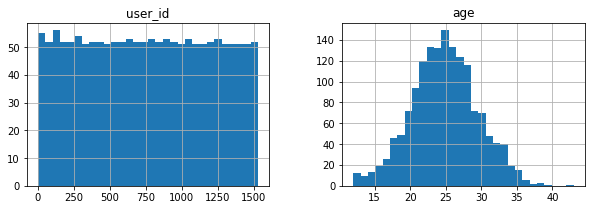

In [4]:
users.hist(figsize=(10,3), bins=30)
pass

**Первичный анализ.**  
Первичный анализ показал что во всех таблицах отсутсвуют пропуски значений. В **DF- users** необходимо проверить на дубликаты значения **user_id**, в **DF-rides** необходимо тип данных data поменять, так же для удобство необходимо округлить значение **distance** до десятых, а **duration** до сотых. **DF-subsc** ни чего пока не делаем.

#### Шаг 2. Предобработка данных

In [5]:
rides['date'] = pd.to_datetime(rides['date'])                # меняем тип на Datetime
rides['month'] = pd.DatetimeIndex(rides['date']).month       # добовляем новый столбец с месяцем
rides.info()
display(rides['date'].unique().max())
rides['date'].unique().min()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


numpy.datetime64('2021-12-30T00:00:00.000000000')

numpy.datetime64('2021-01-01T00:00:00.000000000')

**Представленная база пириодом в один год.**

**Проверяем на нули и на колличесво дубликатов**

In [6]:
def check(df):
    display(df.isna().sum())
    print('Колличество  дубликатов: ', df.duplicated().sum()) 
    print()

In [7]:
base = (users, rides, subsc)
for df in base:
    check(df)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Колличество  дубликатов:  31



user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Колличество  дубликатов:  0



subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Колличество  дубликатов:  0



**В связи с тем что дубли обнаружены только в DF-users работаем с ним. В других DF все впорядке**

In [8]:
#print(users[users['user_id'] == 611] )
users = users.drop_duplicates(subset=['user_id'], keep='first') # удаляем дубли

users = users.reset_index(drop=True)                            # переиндексируем DF


print("Число строк в датафрейме users:", users.shape[0])
print("Число уникальных пользователей:", users['user_id'].count())
print('Колличество  дубликатов: ',users.duplicated().sum())

Число строк в датафрейме users: 1534
Число уникальных пользователей: 1534
Колличество  дубликатов:  0


**Округляем значения в столбцах duration и duration:**

In [9]:
rides['distance'] = rides['distance'].round(1)
rides['duration'] = rides['duration'].round(2)
rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.9,25.60,2021-01-01,1
1,1,2617.6,15.82,2021-01-18,1
2,1,754.2,6.23,2021-04-20,4
3,1,2694.8,18.51,2021-08-11,8
4,1,4028.7,26.27,2021-08-28,8
5,1,2770.9,16.65,2021-10-09,10
6,1,3039.0,14.93,2021-10-19,10
7,1,2842.1,23.12,2021-11-06,11
8,1,3412.7,15.24,2021-11-14,11
9,1,748.7,15.04,2021-11-22,11


**Было 31 дублированная запись, дубли удалил. Округлиз дначения расстояния и времени до "вменяемых значений". После "чиски" базы стало 1534 записи.**

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:  
3.1 частота встречаемости городов;  
3.2 соотношение пользователей с подпиской и без подписки;  
3.3 возраст пользователей;  
3.4 расстояние, которое пользователь преодолел за одну поездку;  
3.5 продолжительность поездок.  

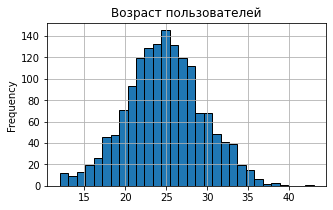

In [10]:
users['age'].plot(kind='hist',
                  bins=30,
                  figsize=(5,3),
                  edgecolor='black',
                  grid=True,
                  title='Возраст пользователей',
                  xlabel='Возраст'
                 )
pass

Вполене ожидаемый результат, мексимальное значение возраста пользователей от 20 до 30 лет.

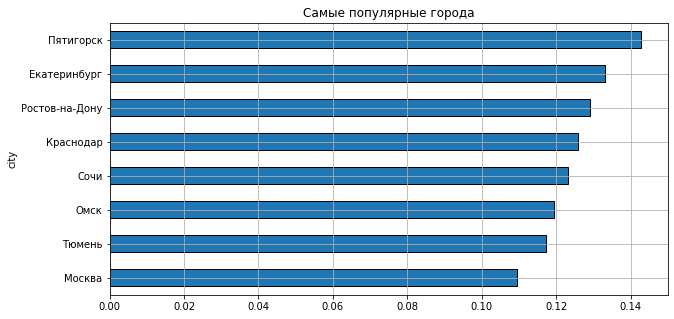

In [11]:
df_for_hi = users.groupby('city').size()/len(users)
df_for_hi_fil = df_for_hi[df_for_hi > 0.01].sort_values()

df_for_hi_fil.plot(kind='barh', figsize=(10,5), title='Самые популярные города', grid=True, ec='black', ylabel=' ')

#df_for_hi_fil.plot(kind='pie', subplots=True, fontsize=12, autopct='%.1f%%', shadow=True, figsize=(20,5), title='Самые популярные города')
pass

pass

Наибольшее колличество в Пятигорске порятдка **14,3%** меньше всего в Москве **11%**

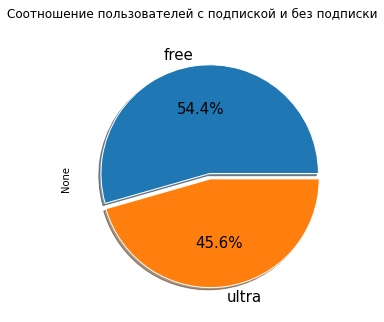

In [12]:

df_for_hi = users.groupby('subscription_type').size()/len(users)
#df_for_hi_fil.plot(kind='barh', figsize=(10,2), title='Cоотношение пользователей с подпиской и без подписки', grid=True, ec='black', ylabel=' ')
#plt.pie(df_for_hi_fil.values, labels=df_for_hi_fil.index, wedgeprops={'linewidth':3, 'edgecolor':'white'}, autopct='%.1f%%', shadow=True,);
explode = (0.05, 0)    # сдвигаем ultra
df_for_hi.plot(kind='pie', subplots=True, fontsize=15, autopct='%.1f%%', shadow=True, figsize=(20,5), 
               title='Cоотношение пользователей с подпиской и без подписки', explode = explode, wedgeprops={'linewidth':1, 'edgecolor':'white'})
pass


Ожидаемо без подписки **54.4%** с подпиской **45.6%**

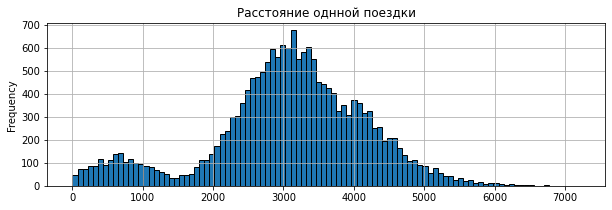

In [13]:

rides['distance'].plot(kind = 'hist', 
                       bins = 100, 
                       figsize=(10,3), 
                       edgecolor='black',
                       grid=True,
                       title='Расстояние однной поездки',
                       xlabel='Дистанция')

pass


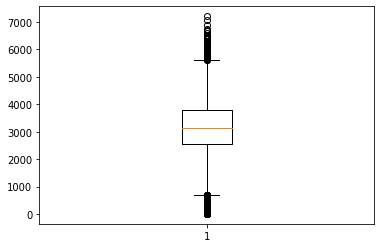

In [14]:
plt.boxplot(rides['distance'])
pass


__Среденее значение расстояния одной поездки, принемает значение от **2500 метров** до **4000 метров**.

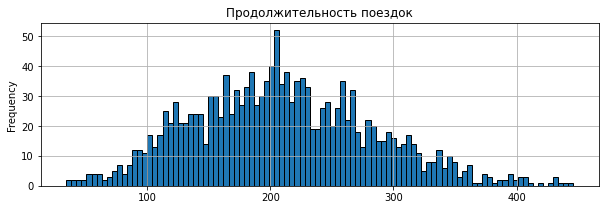

In [15]:
rides.groupby('user_id')['duration'].sum().plot(kind = 'hist', 
                                                bins = 100,
                                                figsize=(10,3),
                                                edgecolor='black',
                                                grid=True,
                                                title='Продолжительность поездок',
                                                xlabel='Продолжительность')

pass

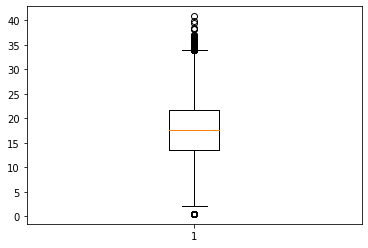

In [16]:
plt.boxplot(rides['duration'])

pass

Вполне ожидаемо средняя продолжительно поездки коррелируется с граффиком расстояние однной поездки

#### Шаг 4. Объединение данных

4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().  
4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:  
c данными о пользователях без подписки;  
с данными о пользователях с подпиской.  
4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.  

In [17]:
users_union = users.merge(rides, on='user_id', how='left')

In [18]:
users.info()
print()
rides.info()
print()
users_union.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB

<class 'pan

In [19]:
users_ultra = users_union [users_union['subscription_type']== 'ultra']

In [20]:
users_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 507.8+ KB


In [21]:
users_free = users_union [users_union ['subscription_type']== 'free']
users_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 903.8+ KB


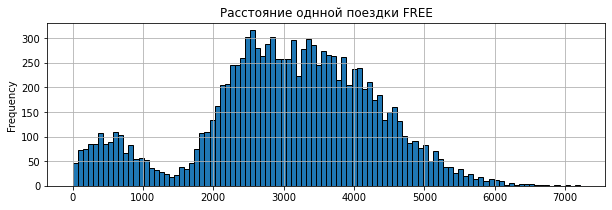

In [22]:
users_free['distance'].plot(kind = 'hist', 
                       bins = 100, 
                       figsize=(10,3), 
                       edgecolor='black',
                       grid=True,
                       title='Расстояние однной поездки FREE',
                       xlabel='Дистанция')

pass


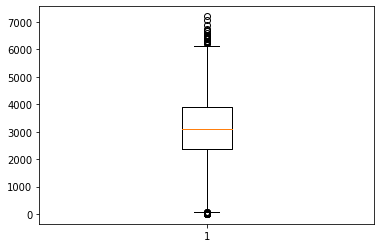

In [23]:
plt.boxplot(users_free['distance'])
pass

__Вывод:__  
Среднее расстояние пользователей Free  от 2300 м. до 4900 м. с мединанным значением 3100 м. Значение после 6000 м. особого влеяния не оказывают. 

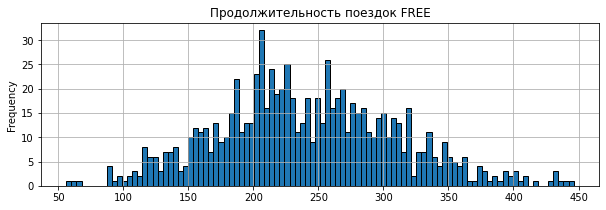

In [24]:
users_free.groupby('user_id')['duration'].sum().plot(kind = 'hist', 
                                                bins = 100,
                                                figsize=(10,3),
                                                edgecolor='black',
                                                grid=True,
                                                title='Продолжительность поездок FREE',
                                                xlabel='Продолжительность')

pass

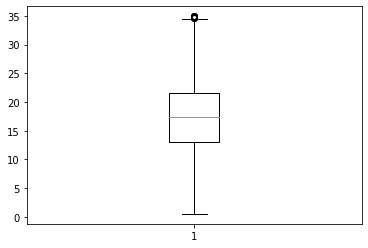

In [25]:
plt.boxplot(users_free['duration'])
pass

__Вывод__  
Основновное время поездок укладывается в значение от 120 до 220. Выбросов нет.

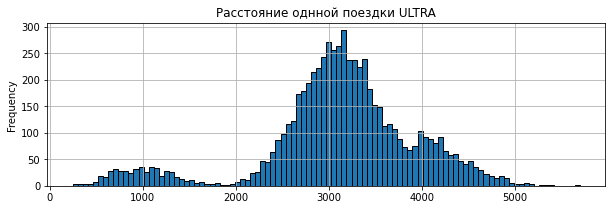

In [26]:
users_ultra['distance'].plot(kind = 'hist', 
                       bins = 100, 
                       figsize=(10,3), 
                       edgecolor='black',
                       grid=True,
                       title='Расстояние однной поездки ULTRA',
                       xlabel='Дистанция')
pass

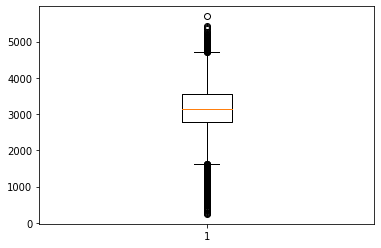

In [27]:
plt.boxplot(users_ultra['distance'])

pass

__Вывод__  
Среднее расстояние пользователей Ultra от 2700 м. до 3500 м. с мединанным значением 3100 м. Значение после 4700 м. особого влеяния не оказывают. 

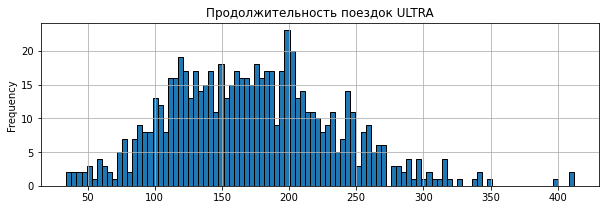

In [28]:
users_ultra.groupby('user_id')['duration'].sum().plot(kind = 'hist', 
                                                bins = 100,
                                                figsize=(10,3),
                                                edgecolor='black',
                                                grid=True,
                                                title='Продолжительность поездок ULTRA',
                                                xlabel='Продолжительность')
pass

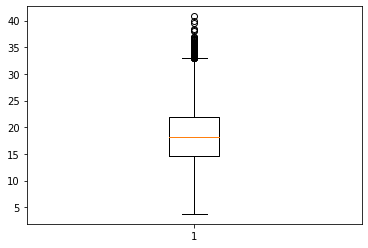

In [29]:
plt.boxplot(users_ultra['duration'])
pass

__Вывод__  
Основновное время поездок тираифа Ultra укладывается в значение от 14 до 22. Выбросов около 32 но влияния не оказывают.

In [30]:
display(users_union.head())
display(rides.head())
display(subsc.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.9,25.60,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.6,15.82,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.2,6.23,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.8,18.51,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.7,26.27,2021-08-28,8


,user_id,distance,duration,date,month
0,1,4409.9,25.60,2021-01-01,1
1,1,2617.6,15.82,2021-01-18,1
2,1,754.2,6.23,2021-04-20,4
3,1,2694.8,18.51,2021-08-11,8
4,1,4028.7,26.27,2021-08-28,8


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 5. Подсчёт выручки

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.   

In [31]:
users_union.isna().sum() # проверяем на пропуски.

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

In [32]:
users_union['duration'] = np.ceil(users_union['duration']) 

users_union_duration = users_union.groupby(['user_id','month', 'subscription_type'])['duration'].agg(['count', 'sum'])
users_union_distance = users_union.groupby(['user_id', 'month', 'subscription_type'])['distance'].sum()

df_users_agg = pd.concat([users_union_distance, users_union_duration ], axis=1)
df_users_agg = df_users_agg.rename(columns={'sum': 'duration'})
df_users_agg = df_users_agg.reset_index()



df_users_agg.head(10)

,user_id,month,subscription_type,distance,count,duration
0,1,1,ultra,7027.5,2,42.0
1,1,4,ultra,754.2,1,7.0
2,1,8,ultra,6723.5,2,46.0
3,1,10,ultra,5809.9,2,32.0
4,1,11,ultra,7003.5,3,56.0
5,1,12,ultra,6751.6,2,28.0
6,2,3,ultra,10187.7,3,63.0
7,2,4,ultra,6164.4,2,40.0
8,2,6,ultra,3255.3,1,14.0
9,2,7,ultra,6780.7,2,48.0


In [33]:
# расчет стоимости
def summ_month(row):
    sum_per_month = 0
    if row['subscription_type'] == 'ultra':
        sum_per_month += row['count'] * 0
        sum_per_month += row['duration'] * 6
        sum_per_month += 199
        return sum_per_month

    else:        
        sum_per_month += row['count'] * 50
        sum_per_month += row['duration'] * 8
        return sum_per_month

In [34]:
df_users_agg['price'] = df_users_agg.apply(summ_month, axis=1)

In [35]:
df_users_agg.head(10)

,user_id,month,subscription_type,distance,count,duration,price
0,1,1,ultra,7027.5,2,42.0,451.0
1,1,4,ultra,754.2,1,7.0,241.0
2,1,8,ultra,6723.5,2,46.0,475.0
3,1,10,ultra,5809.9,2,32.0,391.0
4,1,11,ultra,7003.5,3,56.0,535.0
5,1,12,ultra,6751.6,2,28.0,367.0
6,2,3,ultra,10187.7,3,63.0,577.0
7,2,4,ultra,6164.4,2,40.0,439.0
8,2,6,ultra,3255.3,1,14.0,283.0
9,2,7,ultra,6780.7,2,48.0,487.0


#### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.  
6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.  
6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.  
6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Первая гипотеза о равенстве средних двух генеральных совокупностей:  
Среденее время поездки тарифов Free и Ultra различны.**

**H0** (нулевая гипотеза) - предположение о том, что между данными у нас нет связи. В данном случае, что среднее вермя тарифа Free не отличается от среднего времени тарифа Ultra.  
**H1** (альтернативная гипотеза) - среднее время пользователей тарифа Free отличается от средней выручки пользователей тарифа Ultra.

Использую метод scipy.stats.ttest_ind (array1, array2, equal_var = False). False, потому что дисперсии наших выборок отличаются.

Критический уровень значимости задам 0.05. Хочу чтобы вероятность правильности моего вывода была 95% и больше.

In [36]:
from scipy import stats as st
#midle_time_ultra = df_users_agg[df_users_agg['subscription_type']=='ultra'].groupby('user_id')['duration'].sum()
#midle_time_free= df_users_agg[df_users_agg['subscription_type']!='ultra'].groupby('user_id')['duration'].sum()
midle_time_ultra = users_ultra['duration']
midle_time_free= users_free['duration']

alpha = 0.05
results = st.ttest_ind(midle_time_ultra, midle_time_free, equal_var = False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-value: 1.1292072022177e-36
Отвергаем нулевую гипотезу


**Выавод по гипотезе 1.**  
Так как p-value принемает невероятные значения, то гепотизу о равестве среднего времени различных тарифов не подтвердилась.  
Разное время поезды у пользователей разных тарифов

**6.2 Расстояние одной поездки в 3130 метров**

**H0** (нулевая гипотеза) - предположение о том, что среднее расстояние тарифа Ultra меньше 3130.  
**H1** (альтернативная гипотеза) - среднее расстояние тарифа Ultra больше 3130.

Использую метод st.ttest_ind (array1, prev_screens_value, alternative='less'). alternative='less', так как интресуют значение не превышающии 3130.  

Критический уровень значимости задам 0.05.

In [37]:
from scipy import stats as st
#screens = df_users_agg[df_users_agg['subscription_type']=='ultra'].groupby('user_id')['distance'].sum()
screens = users_ultra['distance']
prev_screens_value = 3130
alpha = 0.05
results = st.ttest_1samp(screens, prev_screens_value, alternative='less')
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

p-value: 0.0804572631664147
Не отвергаем нулевую гипотезу


**Вывод по гипотизе 2.**   
Гипотеза подтвердилась.  
Проверили гипотезу, и мы можем утверждать, что среднее расстояние, которое проехали пользователи на тарифе Ultra не превышает 3130 метров.

**6.3 Проверька гипотезы о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки**

**H0** (нулевая гипотеза) - предположение о том, что средняя выручка от пользователей с подпиской Ultra меньше чем от пользователей без подписки.  
**H1** (альтернативная гипотеза) - средненяя выгучка от тарифа Ultra больше чем от пользователей без подписки.

In [38]:
from scipy import stats as st

ultra_per_mnth = df_users_agg[df_users_agg['subscription_type']=='ultra']['price']
free_per_mnth = df_users_agg[df_users_agg['subscription_type']!='ultra']['price']

alpha = 0.05
results = st.ttest_ind(ultra_per_mnth, free_per_mnth, alternative='greater')
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
     print("Не отвергаем нулевую гипотезу")

P-value: 1.8164914860049708e-31
Отвергаем нулевую гипотезу


**Вывод по гипотизе 3.**   
Проверили гипотезу она не подтвердилась, соответственно, мы можем утверждать, что выручка от пользователей по подписке ultra превышает выручку от пользователей без подписки.

**Определение средних значений.**

In [39]:
def midle(row):
    midle_time_ultra = df_users_agg[df_users_agg['subscription_type']=='ultra'].groupby('user_id')[row].sum()
    midle_time_free= df_users_agg[df_users_agg['subscription_type']!='ultra'].groupby('user_id')[row].sum()
    if row == 'duration':
        print('Среденее время поездки Ultra: ', (midle_time_ultra.sum()/len(df_users_agg[df_users_agg['subscription_type']=='ultra'])).round(1), 'мин.') # проверка гипотезы  времени.
        print('Среденее время поездки Free: ', (midle_time_free.sum()/len(df_users_agg[df_users_agg['subscription_type']!='ultra'])).round(1),'мин.')
        print()
    elif row == 'distance':
        print('Среденее расстояние поездки Ultra: ', ((midle_time_ultra.sum()/len(df_users_agg[df_users_agg['subscription_type']=='ultra']))/1000).round(1), 'км.') # проверка гипотезы расстояния.
        print('Среденее растояние поездки Free: ', ((midle_time_free.sum()/len(df_users_agg[df_users_agg['subscription_type']!='ultra']))/1000).round(1),'км.')
        print()
    elif row == 'price':
        print('Среденее значение выручки Ultra: ', (midle_time_ultra.sum()/len(df_users_agg[df_users_agg['subscription_type']=='ultra'])).round(1), 'руб.') # проверка гипотезы выручки.
        print('Среденее значение выручки Free: ', (midle_time_free.sum()/len(df_users_agg[df_users_agg['subscription_type']!='ultra'])).round(1),'руб.')    


In [40]:
midles = ('duration', 'distance', 'price')
for df in midles:
    midle(df)

Среденее время поездки Ultra:  27.3 мин.
Среденее время поездки Free:  30.4 мин.

Среденее расстояние поездки Ultra:  4.5 км.
Среденее растояние поездки Free:  5.2 км.

Среденее значение выручки Ultra:  362.7 руб.
Среденее значение выручки Free:  328.6 руб.


**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?** 

Решение:  

Применим гипотезу о равенстве среднего значения генеральной совокупности до и после изменения(Две зависимые (парные) выборки).  

Гипотезы будут сформулированы так:  

**H0**(нулевая гипотеза) :        i1 = i2  
**H1**(альтернативная гипотеза) : i1 != i2  
где i1 - средние значения количество обращений в техподдержку до изменений.  
    i2 - средние значения количество обращений в техподдержку и после изменения.  

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()  

Доход пользователей с тарифам Union:  1644237.0
Доход пользователей без тарифа:       2233656.0


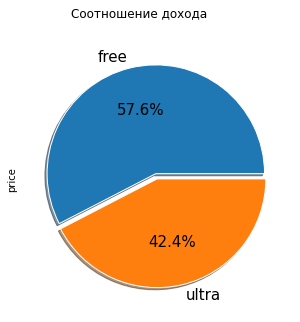

In [41]:
#проверяем доход компании.
explode = (0.05, 0)    # сдвигаем ultra
df_users_agg.groupby('subscription_type')['price'].sum().plot(kind='pie', subplots=True, fontsize=15, autopct='%.1f%%', shadow=True, figsize=(20,5), 
               title='Cоотношение дохода', explode = explode, wedgeprops={'linewidth':1, 'edgecolor':'white'})

print('Доход пользователей с тарифам Union: ',df_users_agg[df_users_agg['subscription_type']=='ultra']['price'].sum())
print('Доход пользователей без тарифа:      ', df_users_agg[df_users_agg['subscription_type']!='ultra']['price'].sum())

pass

__Вывод:__
Загрузил 3 DF: с пользователями, информацией о поездках, информацией о подписках.  

Проверили данные на пропуски, их не оказалось ни в одной таблице. Поменяли тип данных у столбца date из датафрейма data_riders к типу даты. Также добавили столбец month с номером месяца. И удалили дубликаты строк из датафрейма с пользователями.  

Провели исследовательский анализ данных:  

Данные показали, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск. Меньше всего пользователей в Москве.  
Пользователей, использующих бесплатную подписку больше - 11568 человек, что является ~55% от общего числа пользователей. На платной подпиской пользуются 6500 пользователей, что соответственно является ~45%.  
Возраст пользователей укладывается в промежуток от 22 до 28 лет
В основном пользователи проезжают от 2.5 км до 3.8 км.
Чаще всего длительность поездки состовляет 12 - 22 минут
Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

Для пользователей с ultra подпиской
Для пользователей с free подпиской  
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.  

Для пользователей тарифа Free время поездки составляет от 12 до 22 минут, и проезжают от т 2300 м. до 4900 м. с мединанным значением 3100 м, есть пользователи.  
Платный тариф. В основном время укладывается в промежуток от 14 до 22 минут и проезжают от 2700 м. до 3500 м. с мединанным значением 3100 м.  
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм df_users_agg. Добавили в датафрейм df_users_agg столбец с помесячной выручкой price.  

Проверили гипотезы:  

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе  
Отвергли нулевую гипотезу  
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку  
Не удалось отвергнуть нулевую гипотезу  
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки  
Отвергли нулевую гипотезу  

Нашел соотношение приносимого дохода казными категориями.  

Пользователи без тарифа приносит около 60% всей выручки, но при этом на него приходится 11568 пользователей. Тариф Ультра дает остальные 40%, но эту выручку генерируют всего 6500 пользователей.  

Таким образом, получается что пользователи тарифа Ultra приносят доход компании в среднем 253 р. за поезду, тогда как пользователи Без тарифа 193 р, мидеанное значение пробега у двух категорий одинаковое получается что выгоднее пользователям не полкупать ториф Ultra, А компании рекомендовал пересмотрить тариф чтобы привлечь больше пользователей за счет дополнительных бонутов, например дистанционная резервация самоката или что-то подобное. 